In [183]:
from settings import Settings
from utils.datasets import MaestroDataset
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as f
import torch.nn.init
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.optim as optim
import matplotlib.pyplot as plt

In [184]:
settings = Settings() # Set Extra Settings in settings.py

In [185]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

print(device)

cpu


In [186]:
dataset = MaestroDataset("train", settings=settings)

In [187]:
print('total number : {}'.format(len(dataset)))

total number : 144910


In [188]:
class lstm_Model(nn.Module):
    def __init__(self):
        super(lstm_Model, self).__init__()

        self.conv_layer = nn.Sequential(
            
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3),
            nn.ReLU(),
            nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3),
            nn.ReLU(),            
            nn.MaxPool2d(kernel_size=2),
            
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3),
            nn.ReLU(),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3),
            nn.ReLU(),            
            nn.MaxPool2d(kernel_size=2),
            
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
            nn.ReLU(),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            
            nn.Conv2d(in_channels=64, out_channels=256, kernel_size=3),
            nn.ReLU()        
            
        )
        self.lstm_layer = nn.LSTM(1*256*2*10, 128)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.conv_layer(x)
        out, (_, _) = self.lstm_layer(out.view(out.size(0), 1, -1))
        out = self.sigmoid(out)

        return out

    def loss(self, output, target):
        loss = nn.MSELoss(output.view(1, -1), target)

        return loss

In [189]:
model = lstm_Model().to(device)
model(torch.Tensor(dataset[1][0][:settings.n_of_cnn_frames]).view(1,1,-1,128)).shape

torch.Size([1, 1, 128])

In [ ]:
cnt=0
model = lstm_Model().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss().to(device)

loss_values = []
for filt, vel in dataset:
    cnt+=1
    if cnt>=100: break
    avg_cost = 0.0
    for it in range(0,settings.length):
        optimizer.zero_grad()
        frame = filt[it:it+settings.n_of_cnn_frames]
        if len(frame)< settings.n_of_cnn_frames:
            frame=np.append(frame, [np.zeros(128, dtype=bool)]*(settings.n_of_cnn_frames-len(frame)),axis=0)
        out = model(torch.Tensor(frame).view(1,1,settings.n_of_cnn_frames,-1).to(device))
        #print(out)
        loss = criterion(out, torch.Tensor(vel).view(1,128,-1).to(device))
        loss.backward()
        optimizer.step()
        print(cnt, ", ", it, " LOSS: ", loss.item())
        avg_cost += loss.item()/settings.length
    print('Data:{} cost={}'.format(cnt+1, avg_cost))
    loss_values.append(avg_cost)
plt.plot(loss_values)
        

1 ,  0  LOSS:  0.25033748149871826
1 ,  1  LOSS:  0.24517051875591278
1 ,  2  LOSS:  0.23737017810344696
1 ,  3  LOSS:  0.22230948507785797
1 ,  4  LOSS:  0.19670748710632324
1 ,  5  LOSS:  0.1666715294122696
1 ,  6  LOSS:  0.14171719551086426
1 ,  7  LOSS:  0.12543298304080963
1 ,  8  LOSS:  0.11603965610265732
1 ,  9  LOSS:  0.10862115025520325
1 ,  10  LOSS:  0.10315496474504471
1 ,  11  LOSS:  0.10244329273700714
1 ,  12  LOSS:  0.10214290767908096
1 ,  13  LOSS:  0.10128388553857803
1 ,  14  LOSS:  0.10128352046012878
1 ,  15  LOSS:  0.10128352046012878
1 ,  16  LOSS:  0.10128352046012878
1 ,  17  LOSS:  0.10128352046012878
1 ,  18  LOSS:  0.10128352046012878
1 ,  19  LOSS:  0.10128352046012878
1 ,  20  LOSS:  0.10128352046012878
1 ,  21  LOSS:  0.10128352046012878
1 ,  22  LOSS:  0.10128352046012878
1 ,  23  LOSS:  0.10128352046012878
1 ,  24  LOSS:  0.10128352046012878
1 ,  25  LOSS:  0.10128352046012878
1 ,  26  LOSS:  0.10128352046012878
1 ,  27  LOSS:  0.10128352046012878
1 ,

2 ,  103  LOSS:  0.10123657435178757
2 ,  104  LOSS:  0.10123657435178757
2 ,  105  LOSS:  0.10123657435178757
2 ,  106  LOSS:  0.10123657435178757
2 ,  107  LOSS:  0.10123657435178757
2 ,  108  LOSS:  0.10123657435178757
2 ,  109  LOSS:  0.10123657435178757
2 ,  110  LOSS:  0.10123657435178757
2 ,  111  LOSS:  0.10123657435178757
2 ,  112  LOSS:  0.10123657435178757
2 ,  113  LOSS:  0.10123657435178757
2 ,  114  LOSS:  0.10123657435178757
2 ,  115  LOSS:  0.10123657435178757
2 ,  116  LOSS:  0.10123657435178757
2 ,  117  LOSS:  0.10123657435178757
2 ,  118  LOSS:  0.10123657435178757
2 ,  119  LOSS:  0.10123657435178757
2 ,  120  LOSS:  0.10123657435178757
2 ,  121  LOSS:  0.10123657435178757
2 ,  122  LOSS:  0.10123657435178757
2 ,  123  LOSS:  0.10123657435178757
2 ,  124  LOSS:  0.10123657435178757
2 ,  125  LOSS:  0.10123657435178757
2 ,  126  LOSS:  0.10123657435178757
2 ,  127  LOSS:  0.10123657435178757
Data:3 cost=0.10123657435178757
3 ,  0  LOSS:  0.10126654803752899
3 ,  1  

4 ,  72  LOSS:  0.10128416121006012
4 ,  73  LOSS:  0.10128416121006012
4 ,  74  LOSS:  0.10128416121006012
4 ,  75  LOSS:  0.10128416121006012
4 ,  76  LOSS:  0.10128416121006012
4 ,  77  LOSS:  0.10128416121006012
4 ,  78  LOSS:  0.10128416121006012
4 ,  79  LOSS:  0.10128416121006012
4 ,  80  LOSS:  0.10128416121006012
4 ,  81  LOSS:  0.10128416121006012
4 ,  82  LOSS:  0.10128416121006012
4 ,  83  LOSS:  0.10128416121006012
4 ,  84  LOSS:  0.10128416121006012
4 ,  85  LOSS:  0.10128416121006012
4 ,  86  LOSS:  0.10128416121006012
4 ,  87  LOSS:  0.10128416121006012
4 ,  88  LOSS:  0.10128416121006012
4 ,  89  LOSS:  0.10128416121006012
4 ,  90  LOSS:  0.10128416121006012
4 ,  91  LOSS:  0.10128416121006012
4 ,  92  LOSS:  0.10128416121006012
4 ,  93  LOSS:  0.10128416121006012
4 ,  94  LOSS:  0.10128416121006012
4 ,  95  LOSS:  0.10128416121006012
4 ,  96  LOSS:  0.10128416121006012
4 ,  97  LOSS:  0.10128416121006012
4 ,  98  LOSS:  0.10128416121006012
4 ,  99  LOSS:  0.1012841612

6 ,  43  LOSS:  0.1012692004442215
6 ,  44  LOSS:  0.1012692004442215
6 ,  45  LOSS:  0.1012692004442215
6 ,  46  LOSS:  0.1012692004442215
6 ,  47  LOSS:  0.1012692004442215
6 ,  48  LOSS:  0.1012692004442215
6 ,  49  LOSS:  0.1012692004442215
6 ,  50  LOSS:  0.1012692004442215
6 ,  51  LOSS:  0.1012692004442215
6 ,  52  LOSS:  0.1012692004442215
6 ,  53  LOSS:  0.1012692004442215
6 ,  54  LOSS:  0.1012692004442215
6 ,  55  LOSS:  0.1012692004442215
6 ,  56  LOSS:  0.1012692004442215
6 ,  57  LOSS:  0.1012692004442215
6 ,  58  LOSS:  0.1012692004442215
6 ,  59  LOSS:  0.1012692004442215
6 ,  60  LOSS:  0.1012692004442215
6 ,  61  LOSS:  0.1012692004442215
6 ,  62  LOSS:  0.1012692004442215
6 ,  63  LOSS:  0.1012692004442215
6 ,  64  LOSS:  0.1012692004442215
6 ,  65  LOSS:  0.1012692004442215
6 ,  66  LOSS:  0.1012692004442215
6 ,  67  LOSS:  0.1012692004442215
6 ,  68  LOSS:  0.1012692004442215
6 ,  69  LOSS:  0.1012692004442215
6 ,  70  LOSS:  0.1012692004442215
6 ,  71  LOSS:  0.10

8 ,  16  LOSS:  0.10125721991062164
8 ,  17  LOSS:  0.10125721991062164
8 ,  18  LOSS:  0.10125721991062164
8 ,  19  LOSS:  0.10125721991062164
8 ,  20  LOSS:  0.10125721991062164
8 ,  21  LOSS:  0.10125721991062164
8 ,  22  LOSS:  0.10125721991062164
8 ,  23  LOSS:  0.10125721991062164
8 ,  24  LOSS:  0.10125721991062164
8 ,  25  LOSS:  0.10125721991062164
8 ,  26  LOSS:  0.10125721991062164
8 ,  27  LOSS:  0.10125721991062164
8 ,  28  LOSS:  0.10125721991062164
8 ,  29  LOSS:  0.10125721991062164
8 ,  30  LOSS:  0.10125721991062164
8 ,  31  LOSS:  0.10125721991062164
8 ,  32  LOSS:  0.10125721991062164
8 ,  33  LOSS:  0.10125721991062164
8 ,  34  LOSS:  0.10125721991062164
8 ,  35  LOSS:  0.10125721991062164
8 ,  36  LOSS:  0.10125721991062164
8 ,  37  LOSS:  0.10125721991062164
8 ,  38  LOSS:  0.10125721991062164
8 ,  39  LOSS:  0.10125721991062164
8 ,  40  LOSS:  0.10125721991062164
8 ,  41  LOSS:  0.10125721991062164
8 ,  42  LOSS:  0.10125721991062164
8 ,  43  LOSS:  0.1012572199

9 ,  117  LOSS:  0.10124631226062775
9 ,  118  LOSS:  0.10124631226062775
9 ,  119  LOSS:  0.10124631226062775
9 ,  120  LOSS:  0.10124631226062775
9 ,  121  LOSS:  0.10124631226062775
9 ,  122  LOSS:  0.10124631226062775
9 ,  123  LOSS:  0.10124631226062775
9 ,  124  LOSS:  0.10124631226062775
9 ,  125  LOSS:  0.10124631226062775
9 ,  126  LOSS:  0.10124631226062775
9 ,  127  LOSS:  0.10124631226062775
Data:10 cost=0.10124631226062775
10 ,  0  LOSS:  0.10113751143217087
10 ,  1  LOSS:  0.10113751143217087
10 ,  2  LOSS:  0.10113751143217087
10 ,  3  LOSS:  0.10113751143217087
10 ,  4  LOSS:  0.10113751143217087
10 ,  5  LOSS:  0.10113751143217087
10 ,  6  LOSS:  0.10113751143217087
10 ,  7  LOSS:  0.10113751143217087
10 ,  8  LOSS:  0.10113751143217087
10 ,  9  LOSS:  0.10113751143217087
10 ,  10  LOSS:  0.10113751143217087
10 ,  11  LOSS:  0.10113751143217087
10 ,  12  LOSS:  0.10113751143217087
10 ,  13  LOSS:  0.10113751143217087
10 ,  14  LOSS:  0.10113751143217087
10 ,  15  LOSS:

plt.plot(loss_values)

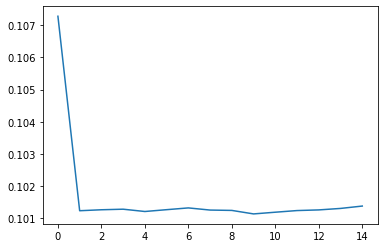

In [182]:
plt.plot(loss_values)